**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: Proyecto integrador**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 4**
Avance 2. Ingeniería de características
---

*  Salvador Martínez Morales A01273366
*  Fernando Acevedo Ortegate A01794022
*  José Francisco Miranda García A00837306


Como parte del avance en esta actividad, retomaremos lo trabajado la semana pasada, realizando un análisis más exhaustivo de los ajustes implementados.

### Importamos librerías necesarias

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

import mysql.connector
import matplotlib.pyplot as plt

In [ ]:
# !pip install mysql-connector-python==8.0.32

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 75.7 MB/s eta 0:00:00


In [ ]:
# Obtiene IP del NoteBook

# !curl ipecho.net/plain

34.21.7.11

### Conexión a base de datos y extracción de información

Para este primer ejercicio de comprensión de datos, extraeremos solo 1000 registros, de los cuales seleccionaremos las columnas que mejor describan la operación de cada una de las sucursales que analizaremos.

In [58]:
# Configura conexión con base de datos de MYSql alojada en GCP

db_connection = mysql.connector.connect(
  host="",
  user="",
  password="",
  database=""
)

cursor = db_connection.cursor()

In [59]:
# Valida estatus de conexión

cursor.execute("SELECT VERSION()")
testConnection = cursor.fetchone()
print(f"Database version: {testConnection[0]}")

Database version: 9.0.1


Para la consulta, utilizaremos una parte de los datos que deseamos analizar. En este caso, nos interesan las siguientes columnas:
* vch_identifier: corresponde al identificador de la sucursal.
* txt_prediction: contiene objetos tipo JSON con diversos valores, como tiempo de servicio, tiempo de espera y número de cajas abiertas por hora.
* int_checkouts: número de checkouts propuestos.
* FLT_TimeAttentionReal: tiempo real de atención.

Todos estos datos provienen de nuestra tabla principal TBL_Snapshots.

In [60]:
# Query de consulta limitada a 100,000 registros, se puede extraer más información, el tamaño actual de la tabla es de 300,000 registros

query = "SELECT vch_identifier, txt_prediction, int_checkouts, FLT_TimeAttentionReal FROM TBL_Snapshots LIMIT 100000;"

In [61]:
# Cargamos los datos en un DataFrame para realizar el análisis a continuación

data = pd.read_sql(query, con=db_connection)
db_connection.close()

# Imprimimos los primeros 5 registros

data.head()

C:\Users\SALVA\AppData\Local\Temp\ipykernel_29032\4050095735.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, con=db_connection)


,vch_identifier,txt_prediction,int_checkouts,FLT_TimeAttentionReal
0,ZA2,"{""tables"":{""checkouts"":["""","""","""","""","""","""",""1"",...",11,106.3470
1,CNA,"{""tables"":{""checkouts"":["""","""","""","""","""","""",""1"",...",5,82.2148
2,ZPA,"{""tables"":{""checkouts"":["""","""","""","""","""","""",""1"",...",6,78.0680
3,CNA,"{""tables"":{""checkouts"":["""","""","""","""","""","""",""1"",...",4,83.7523
4,ZRY,"{""tables"":{""checkouts"":["""","""","""","""","""","""",""1"",...",7,92.9797


## Parte 1, análisis de datos

### Procesamiento de columna txt_prediction de objetos tipo JSON

Nuestro conjunto de datos contiene una serie de objetos en formato JSON, de los cuales debemos extraer la información para su posterior análisis. A continuación, se muestra un ejemplo de cómo se presenta el objeto JSON, del cual nos interesa extraer el objeto Tables con los valores: checkouts, services, waitings y arrives.

{
  "tables": {
    "checkouts": [
      "",
      "",
      "",
      "",
      "",
      "",
      "1",
      "5",
      "7",
      "8",
      "8",
      "8",
      "9",
      "9",
      "9",
      "10",
      "9",
      "9",
      "9",
      "8",
      "6",
      "1"
    ],
    "services": [
      "",
      "",
      "",
      "",
      "",
      "",
      "0.0",
      "1.7",
      "2.0",
      "2.0",
      "2.0",
      "1.9",
      "1.9",
      "2.0",
      "1.9",
      "2.1",
      "2.0",
      "1.8",
      "1.9",
      "2.1",
      "2.0",
      "3.3"
    ],
    "waitings": [
      "",
      "",
      "",
      "",
      "",
      "",
      "0.3",
      "6.6",
      "9.4",
      "7.8",
      "8.7",
      "8.7",
      "9",
      "9",
      "7.7",
      "7.4",
      "7.2",
      "9",
      "8.5",
      "9.4",
      "7.7",
      "1.8"
    ],
    "arrives": [
      "",
      "",
      "",
      "",
      "",
      "",
      "1",
      "49",
      "77",
      "83",
      "86",
      "86",
      "98",
      "98",
      "93",
      "102",
      "91",
      "98",
      "96",
      "88",
      "62",
      "5"
    ]
  },
  "graphs": {
    "checkouts": [
      [
        "1",
        "6",
        "7",
        "8",
        "8",
        "8",
        "10",
        "9",
        "9",
        "9",
        "10",
        "9",
        "9",
        "8",
        "7",
        "3"
      ],
      [
        "1",
        "5",
        "7",
        "8",
        "8",
        "8",
        "9",
        "9",
        "9",
        "10",
        "9",
        "9",
        "9",
        "8",
        "6",
        "1"
      ]
    ],
    "services": [
      [
        "0.0",
        "1.7",
        "2.0",
        "2.0",
        "2.0",
        "1.9",
        "1.9",
        "2.0",
        "1.9",
        "2.1",
        "2.0",
        "1.8",
        "1.9",
        "2.1",
        "2.0",
        "3.3"
      ]
    ],
    "waitings": [
      [
        "0.3",
        "6.6",
        "9.4",
        "7.8",
        "8.7",
        "8.7",
        "9",
        "9",
        "7.7",
        "7.4",
        "7.2",
        "9",
        "8.5",
        "9.4",
        "7.7",
        "1.8"
      ]
    ],
    "arrives": [
      [
        "1",
        "49",
        "77",
        "83",
        "86",
        "86",
        "98",
        "98",
        "93",
        "102",
        "91",
        "98",
        "96",
        "88",
        "62",
        "5"
      ]
    ],
    "costs": [
      [
        "2.40",
        "24079.51",
        "48794.00",
        "51257.66",
        "49936.88",
        "45209.72",
        "54947.95",
        "59885.56",
        "52444.49",
        "54312.74",
        "51119.75",
        "50535.40",
        "48241.63",
        "55121.12",
        "31156.93",
        "5911.08"
      ]
    ],
    "cozts": [
      [
        "2.40",
        "512.33",
        "588.77",
        "599.50",
        "533.37",
        "492.75",
        "520.83",
        "547.53",
        "513.53",
        "547.92",
        "495.71",
        "486.50",
        "452.97",
        "533.86",
        "477.50",
        "824.80"
      ]
    ],
    "labels": [
      "6",
      "7",
      "8",
      "9",
      "10",
      "11",
      "12",
      "13",
      "14",
      "15",
      "16",
      "17",
      "18",
      "19",
      "20",
      "21"
    ]
  }
}


Función de extracción y procesamiento de datos tipo JSON

In [62]:
import pandas as pd
import json

def extract_json_fields(json_str):
    try:
        # Paso 1, se extrae el json de la columna txt_prediction
        json_data = json.loads(json_str.replace('\'', '\"'))
        if isinstance(json_data, str):
            json_data = json.loads(json_data)
        tables = json_data.get('tables', {})
    except json.JSONDecodeError:
        # Paso 2, en caso de que algún objeto esté mal formado o no tenga datos se le asigna un valor por defecto en la decodificación del JSON
        tables = {}

    # Paso 3, en este paso se decidió sumar todos los valores de cada hora por objeto, para obtener un valor global que utilizaremos en el análisis
    # en caso de que no se cuente con valor alguno (NAN) se le agrega un 0
    checkouts = sum(float(item) for item in tables.get('checkouts', []) if isinstance(item, (int, float, str)) and item != '')
    waitings = sum(float(item) for item in tables.get('waitings', []) if isinstance(item, (int, float, str)) and item != '')
    services = sum(float(item) for item in tables.get('services', []) if isinstance(item, (int, float, str)) and item != '')
    arrives = sum(float(item) for item in tables.get('arrives', []) if isinstance(item, (int, float, str)) and item != '')

    return pd.Series([checkouts, waitings, services, arrives], index=['checkouts', 'waitings', 'services', 'arrives'])

# Aplicamos nuestra función
data[['checkouts', 'waitings', 'services', 'arrives']] = data['txt_prediction'].apply(lambda x: extract_json_fields(x) if isinstance(x, str) else pd.Series([0, 0, 0, 0], index=['checkouts', 'waitings', 'services', 'arrives']))


In [63]:
# Crear un nuevo DataFrame con las columnas seleccionadas
new_dataset = data[['vch_identifier', 'checkouts', 'waitings', 'services', 'arrives', 'FLT_TimeAttentionReal']].copy()
new_dataset.rename(columns={'vch_identifier': 'sucursal', 'FLT_TimeAttentionReal': 'tiemporealatencion'}, inplace=True)

print(new_dataset.head())

  sucursal  checkouts  waitings  services  arrives  tiemporealatencion
0      ZA2      116.0     118.2      30.6   1213.0            106.3470
1      CNA       55.0      83.1      21.0    587.0             82.2148
2      ZPA       81.0     207.6      20.4    766.0             78.0680
3      CNA       49.0      91.8      21.0    587.0             83.7523
4      ZRY       81.0     112.0      23.8   1064.0             92.9797


### Proceso de análisis de información y estadisticas descriptivas

#### Análisis de estadísticas descriptivas

Estadísiticas descriptivas

En esta sección, podemos observar de manera general los valores de nuestros datos, tanto en sus estadísticas descriptivas como en los tipos de datos correspondientes.

In [64]:
print(new_dataset.describe())

          checkouts      waitings      services       arrives  \
count  20035.000000  19968.000000  20035.000000  20035.000000   
mean      73.850312    109.635226     25.254714    926.012828   
std       23.148554    225.003476     49.617203    297.183782   
min        0.000000      0.000000  -4262.400000      0.000000   
25%       55.000000     90.000000     21.100000    715.000000   
50%       69.000000    104.400000     24.000000    899.000000   
75%       88.000000    117.800000     27.200000   1078.500000   
max      183.000000  11879.900000    746.500000   2818.000000   

       tiemporealatencion  
count        19861.000000  
mean            97.364423  
std             20.709879  
min             50.314600  
25%             84.115300  
50%             93.336200  
75%            106.566000  
max            213.729000  


Tipos de variables

In [65]:
new_dataset.dtypes

sucursal               object
checkouts             float64
waitings              float64
services              float64
arrives               float64
tiemporealatencion    float64
dtype: object

#### Generación de histogramas

De los siguientes histogramas podemos visualizar lo siguiente:

**Checkouts**: Se puede visualizar una distribución bimodal, con un sesgo de datos a la izquierda en donde los valores más altos están entre los 55 y 70 minutos

**Waitings**: Para los tiempos de espera podemos visualizar que son menores, es decir que hay una tendencia marcada a que los tiempos de espera sean bajos en referencia a los datos mostrados en general.

**Services**: Para el caso de los tiempos de servicio estos tienden a ser bajos igual que los tiempos de atención.

**Arrives**: En este caso la distribución es más homogenea (normal) en donde podemos observar un ligero sesgo a la izquierda donde se puede visualizar algunas llegadas atipicas que podremos observar de mejor fomra en los boxplots

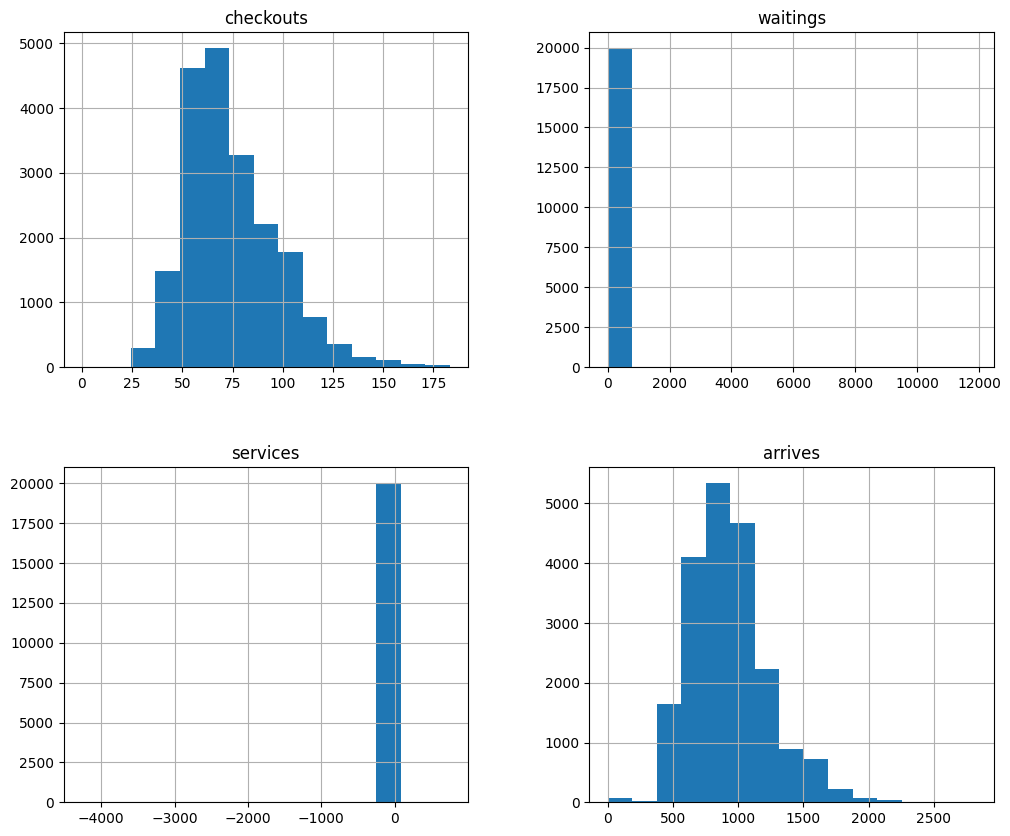

In [66]:
# Histogramas
new_dataset[['checkouts', 'waitings', 'services', 'arrives']].hist(bins=15, figsize=(12, 10))
plt.show()

#### Generación de cajas Boxplots

En los gráficos de caja, podemos observar que, en el caso de los tiempos de espera (waitings), los outliers son más pronunciados. Esto indica que, aunque generalmente los tiempos de espera son bajos, existen ciertas eventualidades que provocan prolongaciones significativas en algunas ocasiones.

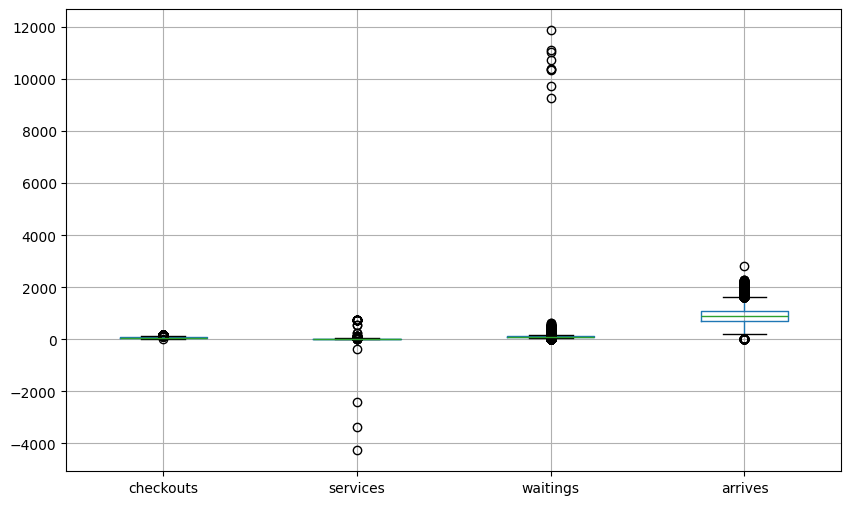

In [67]:
# Boxplots for each variable to show outliers
new_dataset.boxplot(column=['checkouts', 'services', 'waitings', 'arrives'], figsize=(10, 6))
plt.show()

#### Identificación de valores atípicos (Outliers)

In [68]:
outliers = new_dataset[['checkouts', 'services', 'waitings', 'arrives']].apply(lambda x: np.abs(x - x.mean()) > (3 * x.std()))
outliers.describe()

,checkouts,services,waitings,arrives
count,20035,20035,20035,20035
unique,2,2,2,2
top,False,False,False,False
freq,19828,20004,20026,19811


#### Conteo de valores (cardinalidad) para aquellos datos categoricos

Para este caso se contabilizó la frecuencia de registros por sucursal

In [69]:
# Conteo de registros por sucursal, contabilizado a los 1,000 registros de la consulta
data_suc = new_dataset['sucursal'].value_counts()
data_suc

sucursal
ZQ6    971
ZOZ    855
ZCL    808
ZCC    794
ZAM    759
      ... 
ZVM     44
ZL2     38
ZJR     32
ZM2     29
CNA     24
Name: count, Length: 69, dtype: int64

#### Análisis de destribución de los datos

In [70]:
from scipy.stats import skew
skewness = new_dataset[['checkouts', 'services', 'waitings', 'arrives']].apply(skew)
skewness

checkouts     0.879131
services    -50.550937
waitings           NaN
arrives       0.765711
dtype: float64

#### Análisis de tendencias (Checkouts)

Podemos observar una tendencia bastante variable en el número de checkouts. Aunque en algunos casos los valores son bajos, en otros, los números son significativamente mayores que los promedios.

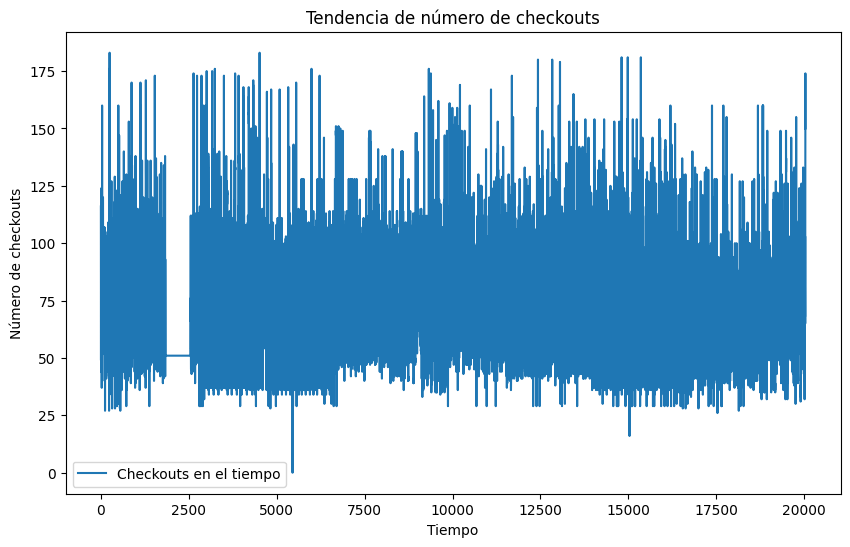

In [71]:
plt.figure(figsize=(10, 6))
plt.plot(new_dataset.index, new_dataset['checkouts'], label='Checkouts en el tiempo')
plt.title('Tendencia de número de checkouts')
plt.xlabel('Tiempo')
plt.ylabel('Número de checkouts')
plt.legend()
plt.show()

#### Mapa de correlaciones

En este diagrama de correlación, podemos observar que las llegadas están fuertemente correlacionadas con los checkouts, seguidas por el tiempo de servicio. Esto es lógico, ya que un mayor número de llegadas requiere un mayor número de cajas abiertas. Al final, lo que buscamos es deducir cuántas cajas necesitamos tener abiertas para atender adecuadamente la demanda de una tienda en condiciones normales.

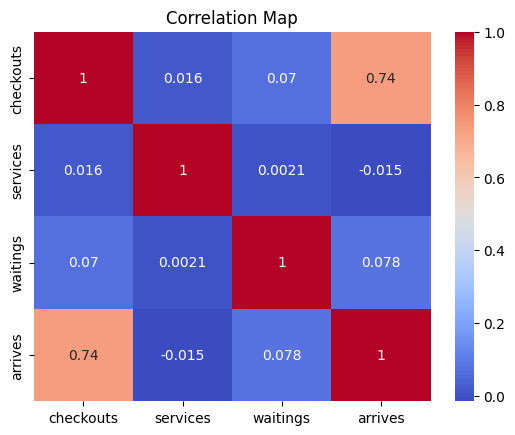

In [72]:
correlation = new_dataset[['checkouts', 'services', 'waitings', 'arrives']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Map')
plt.show()

#### Justificación y análisi de mapa de correlación

Identificar la correlación entre las ventas, el flujo de clientes y el número de cajas necesarias para satisfacer la demanda es crucial por varias razones:

*   **Optimización de Recursos**: Si existe una fuerte correlación, esto indica que a medida que aumenta el número de clientes, las ventas también crecen y se requiere más cajas. Conocer esta relación permite ajustar de manera eficiente el número de cajas y empleados necesarios durante las horas de mayor afluencia.
*   **Predicción más precisa**: Comprender cómo se relacionan estas variables ayuda a construir modelos predictivos más precisos. Un modelo que considere esta correlación puede captar patrones que otros modelos más simples podrían pasar por alto.
*   **Planificación Estratégica**: Analizar esta relación también brinda información sobre cómo los cambios en las ventas, promociones o incluso la disposición de la tienda pueden impactar tanto el flujo de clientes como las ventas, facilitando una mejor planificación a largo plazo.



## Parte 2, normalización de datos

En nuestro conjunto de datos, es necesario aplicar una transformación, ya que la mayoría de los datos están expresados en tiempo (minutos), a excepción de los checkouts, que presentan una distribución discreta.

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(new_dataset[['checkouts', 'services', 'waitings', 'arrives']])
data_scaled = pd.DataFrame(data_scaled, columns=['checkouts', 'services', 'waitings', 'arrives'])
data_scaled.head()


,checkouts,services,waitings,arrives
0,1.820880,0.107733,0.038066,0.965713
1,-0.814340,-0.085753,-0.117935,-1.140780
2,0.308869,-0.097846,0.435403,-0.538444
3,-1.073541,-0.085753,-0.079268,-1.140780
4,0.308869,-0.029319,0.010510,0.464328


Verificamos el número de datos nulos o vacíos en nuestras columnas

In [74]:
print(new_dataset.isnull().sum())

sucursal                0
checkouts               0
waitings               67
services                0
arrives                 0
tiemporealatencion    174
dtype: int64


Para este caso imputaremos con la media las columnas:
*  waitings
*  tiemporealatencion

In [75]:
new_dataset['waitings'].fillna(new_dataset['waitings'].mean(), inplace=True)  # Imputar con la media
new_dataset['tiemporealatencion'].fillna(new_dataset['tiemporealatencion'].mean(), inplace=True)  # Imputar con la media

C:\Users\SALVA\AppData\Local\Temp\ipykernel_29032\2154381284.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_dataset['waitings'].fillna(new_dataset['waitings'].mean(), inplace=True)  # Imputar con la media
C:\Users\SALVA\AppData\Local\Temp\ipykernel_29032\2154381284.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

Verificacmos nuevamente los valores nulos

In [76]:
print(new_dataset.isnull().sum())

sucursal              0
checkouts             0
waitings              0
services              0
arrives               0
tiemporealatencion    0
dtype: int64


Para el caso de la variable categorica "Sucursal" la codificaremos para poder realizar el entrenamiento posteriormente

In [77]:
from sklearn.preprocessing import LabelEncoder

# Ejemplo de codificación con LabelEncoder
label_encoder = LabelEncoder()
new_dataset['sucursal'] = label_encoder.fit_transform(new_dataset['sucursal'])

In [78]:
new_dataset.head()

,sucursal,checkouts,waitings,services,arrives,tiemporealatencion
0,4,116.0,118.2,30.6,1213.0,106.3470
1,1,55.0,83.1,21.0,587.0,82.2148
2,45,81.0,207.6,20.4,766.0,78.0680
3,1,49.0,91.8,21.0,587.0,83.7523
4,51,81.0,112.0,23.8,1064.0,92.9797


Aplicaremos un escalamiento a todas nuestras variables para que ajusten de mejor forma a nuestro algoritmo

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
new_dataset['arrives_scaled'] = scaler.fit_transform(new_dataset[['arrives']])
new_dataset['services_scaled'] = scaler.fit_transform(new_dataset[['services']])
new_dataset['waitings_scaled'] = scaler.fit_transform(new_dataset[['waitings']])
new_dataset['checkouts_scaled'] = scaler.fit_transform(new_dataset[['checkouts']])

In [80]:
new_dataset.head()

,sucursal,checkouts,waitings,services,arrives,tiemporealatencion,arrives_scaled,services_scaled,waitings_scaled,checkouts_scaled
0,4,116.0,118.2,30.6,1213.0,106.3470,0.965713,0.107733,0.038130,1.820880
1,1,55.0,83.1,21.0,587.0,82.2148,-1.140780,-0.085753,-0.118133,-0.814340
2,45,81.0,207.6,20.4,766.0,78.0680,-0.538444,-0.097846,0.436133,0.308869
3,1,49.0,91.8,21.0,587.0,83.7523,-1.140780,-0.085753,-0.079401,-1.073541
4,51,81.0,112.0,23.8,1064.0,92.9797,0.464328,-0.029319,0.010528,0.308869


Por último eliminaremos algunos outliers que observamos en el diagrama de caja, para tener un set de datos más limpio

In [83]:
def remove_outliers_iqr(df, columns):
    for column in columns:
        
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Columnas de las cuales eliminaremos los outliers
columns_to_clean = ['checkouts_scaled', 'services_scaled', 'waitings_scaled', 'arrives_scaled']

final_df = remove_outliers_iqr(new_dataset, columns_to_clean)
print(final_df)

       sucursal  checkouts  waitings  services  arrives  tiemporealatencion  \
0             4      116.0     118.2      30.6   1213.0          106.347000   
1             1       55.0      83.1      21.0    587.0           82.214800   
3             1       49.0      91.8      21.0    587.0           83.752300   
4            51       81.0     112.0      23.8   1064.0           92.979700   
5            51       83.0     120.0      24.6   1092.0          109.812000   
...         ...        ...       ...       ...      ...                 ...   
20026        34       90.0      64.3      29.4   1189.0           97.364423   
20027        34       78.0      60.8      26.2   1052.0           97.364423   
20028        59       65.0      56.3      24.3    593.0           97.364423   
20029        21      129.0      51.2      29.4   1564.0           97.364423   
20030        21      123.0      52.0      28.3   1563.0           97.364423   

       arrives_scaled  services_scaled  waitings_sc

Por último observaremos cómo se ven nuestros datos ya listos para ingresarlos al algoritmo de aprendizaje automático

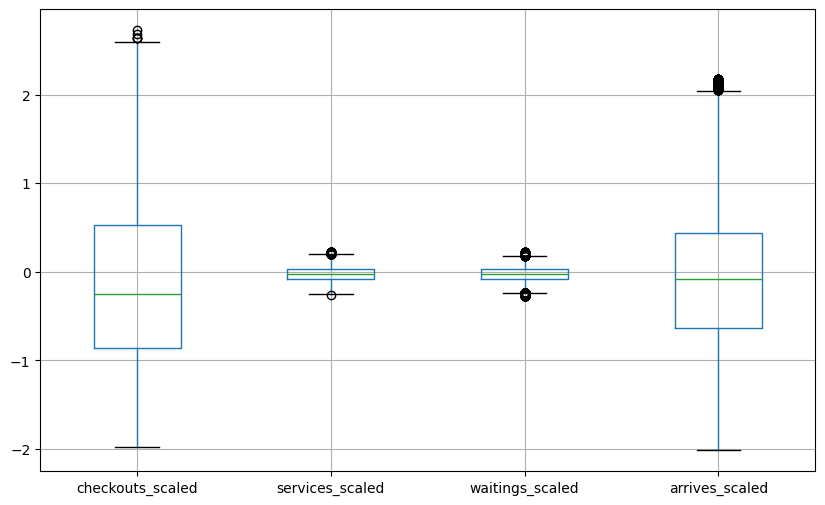

In [84]:
# Boxplots for each variable to show outliers
final_df.boxplot(column=['checkouts_scaled', 'services_scaled', 'waitings_scaled', 'arrives_scaled'], figsize=(10, 6))
plt.show()

## Justificación de modelo seleccionado

Como parte de nuestra propuesta, hemos seleccionado como primera opción el algoritmo de aprendizaje supervisado Random Forest para realizar el análisis de la información. En las próximas semanas, se llevará a cabo un análisis detallado del modelo y su rendimiento.

**Random Forest** es un algoritmo de aprendizaje supervisado utilizado tanto para clasificación como para regresión. Su uso está justificado por los siguientes puntos:

*   **Manejo de Datos No Lineales**: Las relaciones entre las variables a menudo no son lineales. Random Forest puede capturar estas relaciones complejas sin necesidad de transformar los datos.
*   **Reducción del Overfitting**: Al utilizar múltiples árboles de decisión y promediar sus resultados, Random Forest reduce el riesgo de sobreajuste, lo que mejora la capacidad de generalización del modelo.
*   **Importancia de Variables**: Random Forest proporciona métricas sobre la importancia de cada variable en las predicciones, lo que permite identificar mejor los factores más influyentes en el número de cajas necesarias.


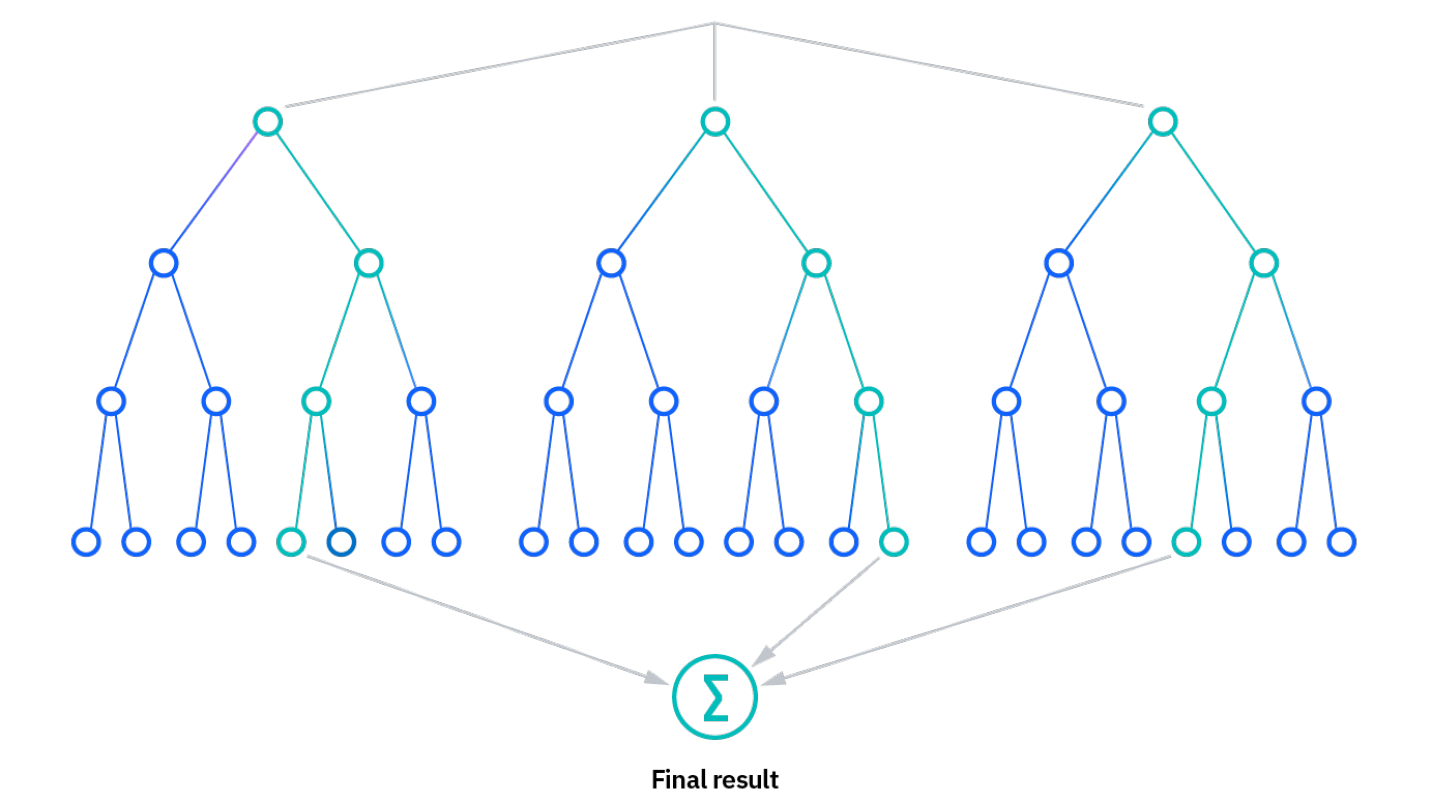

#### Referencias

Ibm. (2023, 3 mayo). Random Forest. ¿Qué es un bosque aleatorio? https://www.ibm.com/mx-es/topics/random-forest